## Intro

In this project, we're going to analyze stock market data to see if a Golden Cross appears.

### What is a Golden Cross?

A Golden Cross occurs when the 50-day simple moving average moves above the 200-day simple moving average.

## Install Dependencies

Install dependencies quietly, so logs don’t reveal sensitive info like absolute paths or user-specific details.

In [46]:
%pip install numpy pandas polygon-api-client matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [47]:
import datetime
import numpy as np
from polygon import RESTClient
import matplotlib.pyplot as plt

### Config

This project uses Polygon.io API to surface data from the stock market.

In [60]:
API_KEY = "<insert API key here>"
client = RESTClient(api_key=API_KEY)

### Get Daily Aggregates

Use API to pull daily aggregates and calculate the simple moving average for 25d, 50d, 100d, and 200d.

In [61]:
def list_aggregates(ticker, from_date, to_date):
    aggs = []
    resp = client.list_aggs(ticker=ticker, multiplier=1, timespan="day", from_=from_date, to=to_date, limit=50000)
    for a in resp:
        aggs.append(a)
    return aggs

def simple_moving_average(data, window):
    closes = [d.close for d in data]  # use attribute access
    if len(closes) < window:
        raise ValueError(f"Not enough data for SMA {window}")
    return np.convolve(closes, np.ones(window) / window, mode='valid')

def plot_stock_sma(symbol, bars):
    closes = [bar.close for bar in bars]
    timestamps = [bar.timestamp for bar in bars]

    # Convert timestamps to datetime
    dates = [datetime.datetime.fromtimestamp(t / 1000) for t in timestamps]

    # Compute SMAs
    sma_25 = simple_moving_average(bars, 25)
    sma_50 = simple_moving_average(bars, 50)
    sma_100 = simple_moving_average(bars, 100)
    sma_200 = simple_moving_average(bars, 200)

    # Align all to the shortest SMA length
    min_len = min(len(sma_25), len(sma_50), len(sma_100), len(sma_200))
    sma_25 = sma_25[-min_len:]
    sma_50 = sma_50[-min_len:]
    sma_100 = sma_100[-min_len:]
    sma_200 = sma_200[-min_len:]
    aligned_dates = dates[-min_len:]
    aligned_prices = closes[-min_len:]

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(aligned_dates, aligned_prices, label="Close", alpha=0.4)
    plt.plot(aligned_dates, sma_25, label="SMA 25")
    plt.plot(aligned_dates, sma_50, label="SMA 50")
    plt.plot(aligned_dates, sma_100, label="SMA 100")
    plt.plot(aligned_dates, sma_200, label="SMA 200")
    plt.title("{} - Simple Moving Averages".format(symbol))
    plt.legend()
    plt.grid(True)
    plt.show()

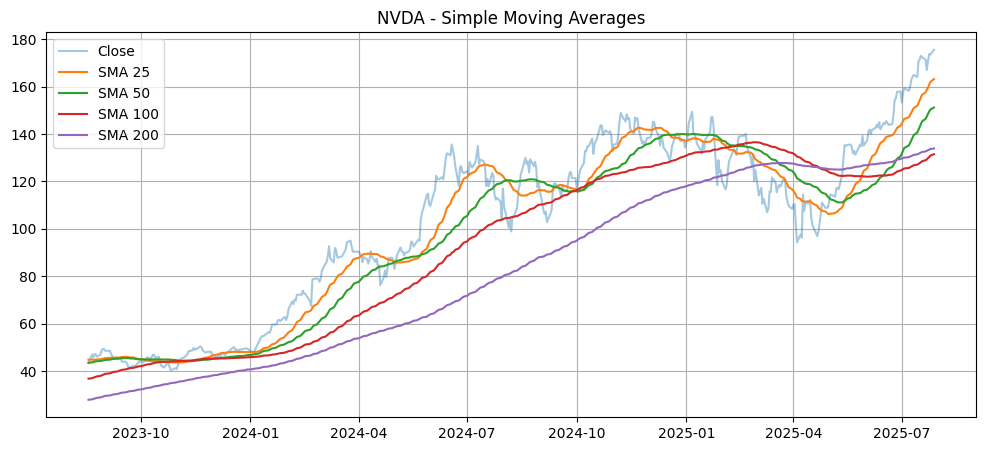

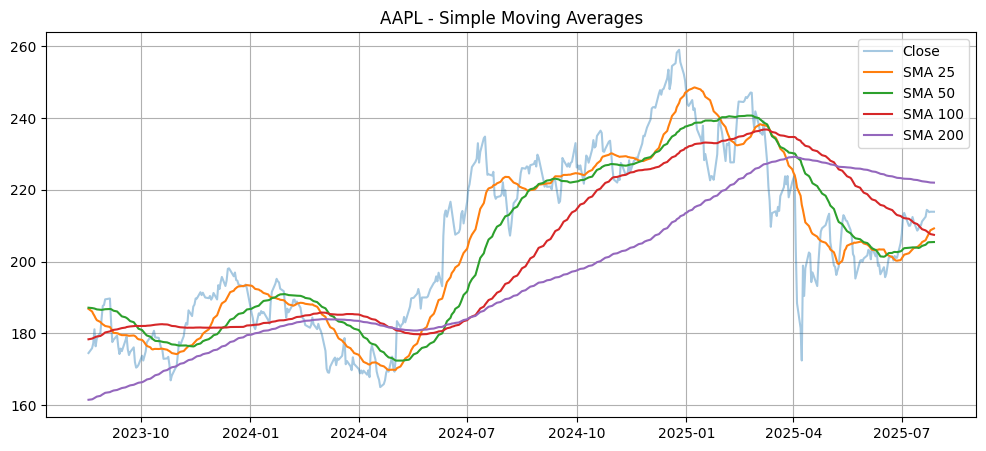

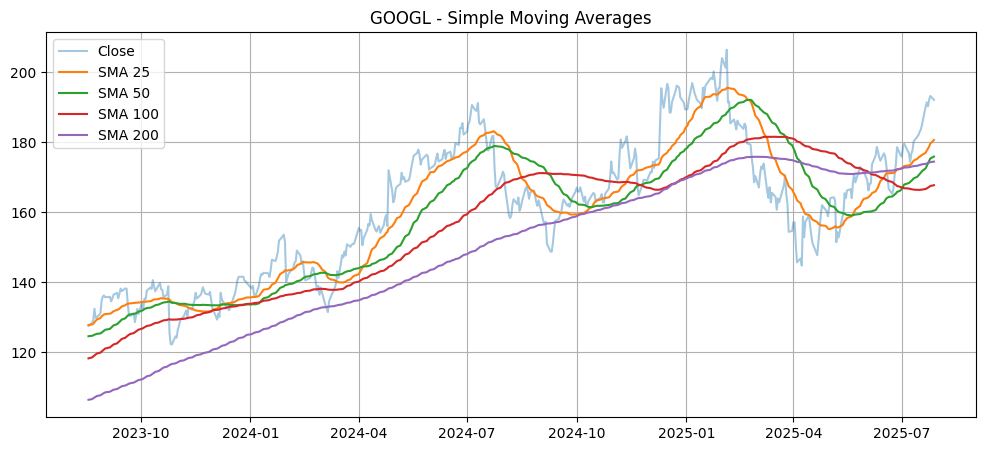

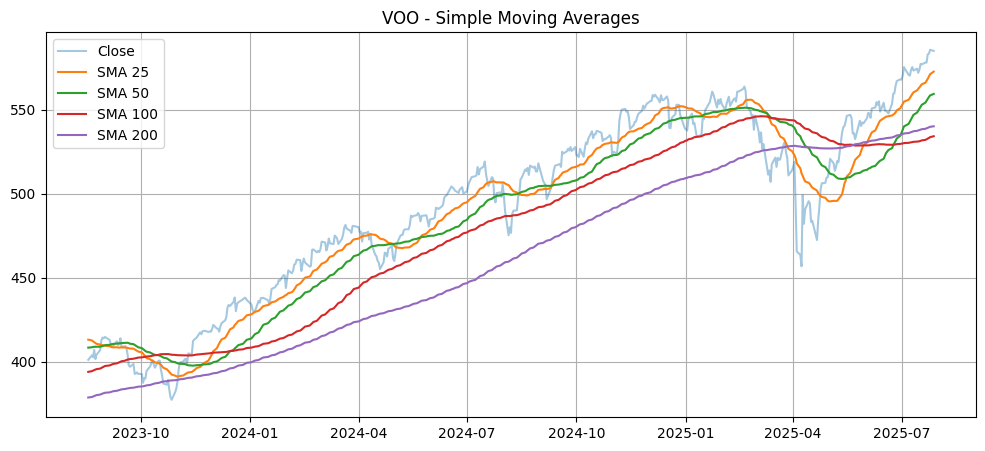

In [62]:
symbols = ["NVDA", "AAPL", "GOOGL", "VOO"]

for symbol in symbols:
    today = datetime.date.today()
    from_date = today - datetime.timedelta(days=1000)
    bars = list_aggregates(symbol, from_date.isoformat(), today.isoformat())

    plot_stock_sma(symbol, bars)